In [1]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt

import theano
import theano.tensor as T
import lasagne
from math import *

Populating the interactive namespace from numpy and matplotlib
Couldn't import dot_parser, loading of dot files will not be possible.


Using gpu device 0: GeForce GTX880M (CNMeM is disabled, cuDNN 5103)
/usr/local/lib/python2.7/dist-packages/theano/sandbox/cuda/__init__.py:599: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


In [24]:
def sample():
    phi = np.random.randint(8)*2*pi/8.0 + 0.05*np.random.randn()
    amp = 0.6
    freq = 0.05*2*pi*(1+0.03*np.random.randn())
    
    wtype = np.random.randint(2)
    
    x = np.arange(128)
    if wtype==0:
        z = amp*np.sin(phi+freq*x)
    elif wtype==1:
        z = amp*(2*(np.sin(phi+freq*x)>0)-1)
    
    return z

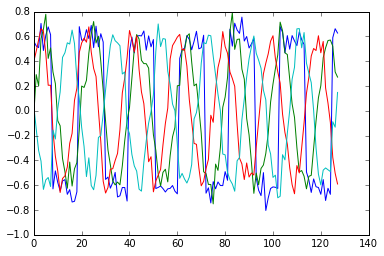

In [49]:
data = []
for i in range(40000):
    data.append(sample() + np.random.randn(128)*0.075)
data = np.array(data)

plt.plot(data[0,:])
plt.plot(data[1,:])
plt.plot(data[2,:])
plt.plot(data[3,:])
plt.show()

In [50]:
invar = T.matrix()
invar2 = T.matrix()

TEMP = 0.2
TEMP2 = 0
HIDDEN = 384
LATENT = 64

input = lasagne.layers.InputLayer((None,128),invar)
input2 = lasagne.layers.InputLayer((None,LATENT),invar2)

p1_dense1 = lasagne.layers.DenseLayer(input, num_units = HIDDEN)
p1_dense1b = lasagne.layers.DenseLayer(p1_dense1, num_units = HIDDEN)
p1_dense2 = lasagne.layers.DenseLayer(p1_dense1b, num_units = LATENT, nonlinearity = None)
p1_noisify = lasagne.layers.GaussianNoiseLayer(p1_dense2, sigma = TEMP)
p1_dense3 = lasagne.layers.DenseLayer(p1_noisify, num_units = HIDDEN)
p1_dense3b = lasagne.layers.DenseLayer(p1_dense3, num_units = HIDDEN)
p1_out = lasagne.layers.DenseLayer(p1_dense3b, num_units=128, nonlinearity = lasagne.nonlinearities.tanh)
p1_outnoise = lasagne.layers.GaussianNoiseLayer(p1_out, sigma = TEMP2)

# Now repeat...
p2_dense1 = lasagne.layers.DenseLayer(p1_outnoise, num_units = HIDDEN, W=p1_dense1.W, b=p1_dense1.b)
p2_dense1b = lasagne.layers.DenseLayer(p2_dense1, num_units = HIDDEN, W=p1_dense1b.W, b=p1_dense1b.b)
p2_dense2 = lasagne.layers.DenseLayer(p2_dense1b, num_units = LATENT, W=p1_dense2.W, b=p1_dense2.b, nonlinearity = None)
p2_noisify = lasagne.layers.GaussianNoiseLayer(p2_dense2, sigma = TEMP)
p2_dense3 = lasagne.layers.DenseLayer(p2_noisify, num_units = HIDDEN, W=p1_dense3.W, b=p1_dense3.b)
p2_dense3b = lasagne.layers.DenseLayer(p2_dense3, num_units = HIDDEN, W=p1_dense3b.W, b=p1_dense3b.b)
p2_out = lasagne.layers.DenseLayer(p2_dense3b, num_units=128, nonlinearity = lasagne.nonlinearities.tanh, W=p1_out.W, b=p1_out.b)
p2_outnoise = lasagne.layers.GaussianNoiseLayer(p2_out, sigma = TEMP2)

# Now repeat...
p3_dense1 = lasagne.layers.DenseLayer(p2_outnoise, num_units = HIDDEN, W=p1_dense1.W, b=p1_dense1.b)
p3_dense1b = lasagne.layers.DenseLayer(p3_dense1, num_units = HIDDEN, W=p1_dense1b.W, b=p1_dense1b.b)
p3_dense2 = lasagne.layers.DenseLayer(p3_dense1b, num_units = LATENT, W=p1_dense2.W, b=p1_dense2.b, nonlinearity = None)
p3_noisify = lasagne.layers.GaussianNoiseLayer(p3_dense2, sigma = TEMP)
p3_dense3 = lasagne.layers.DenseLayer(p3_noisify, num_units = HIDDEN, W=p1_dense3.W, b=p1_dense3.b)
p3_dense3b = lasagne.layers.DenseLayer(p3_dense3, num_units = HIDDEN, W=p1_dense3b.W, b=p1_dense3b.b)
p3_out = lasagne.layers.DenseLayer(p3_dense3b, num_units=128, nonlinearity = lasagne.nonlinearities.tanh, W=p1_out.W, b=p1_out.b)
p3_outnoise = lasagne.layers.GaussianNoiseLayer(p3_out, sigma = TEMP2)

# Now repeat...
p4_dense1 = lasagne.layers.DenseLayer(p3_outnoise, num_units = HIDDEN, W=p1_dense1.W, b=p1_dense1.b)
p4_dense1b = lasagne.layers.DenseLayer(p4_dense1, num_units = HIDDEN, W=p1_dense1b.W, b=p1_dense1b.b)
p4_dense2 = lasagne.layers.DenseLayer(p4_dense1b, num_units = LATENT, W=p1_dense2.W, b=p1_dense2.b, nonlinearity = None)
p4_noisify = lasagne.layers.GaussianNoiseLayer(p4_dense2, sigma = TEMP)
p4_dense3 = lasagne.layers.DenseLayer(p4_noisify, num_units = HIDDEN, W=p1_dense3.W, b=p1_dense3.b)
p4_dense3b = lasagne.layers.DenseLayer(p4_dense3, num_units = HIDDEN, W=p1_dense3b.W, b=p1_dense3b.b)
p4_out = lasagne.layers.DenseLayer(p4_dense3b, num_units=128, nonlinearity = lasagne.nonlinearities.tanh, W=p1_out.W, b=p1_out.b)
p4_outnoise = lasagne.layers.GaussianNoiseLayer(p4_out, sigma = TEMP2)

# Now repeat...
p5_dense1 = lasagne.layers.DenseLayer(p4_outnoise, num_units = HIDDEN, W=p1_dense1.W, b=p1_dense1.b)
p5_dense1b = lasagne.layers.DenseLayer(p5_dense1, num_units = HIDDEN, W=p1_dense1b.W, b=p1_dense1b.b)
p5_dense2 = lasagne.layers.DenseLayer(p5_dense1b, num_units = LATENT, W=p1_dense2.W, b=p1_dense2.b, nonlinearity = None)
p5_noisify = lasagne.layers.GaussianNoiseLayer(p5_dense2, sigma = TEMP)
p5_dense3 = lasagne.layers.DenseLayer(p5_noisify, num_units = HIDDEN, W=p1_dense3.W, b=p1_dense3.b)
p5_dense3b = lasagne.layers.DenseLayer(p5_dense3, num_units = HIDDEN, W=p1_dense3b.W, b=p1_dense3b.b)
p5_out = lasagne.layers.DenseLayer(p5_dense3b, num_units=128, nonlinearity = lasagne.nonlinearities.tanh, W=p1_out.W, b=p1_out.b)
p5_outnoise = lasagne.layers.GaussianNoiseLayer(p5_out, sigma = TEMP2)

# Now repeat...
p6_dense1 = lasagne.layers.DenseLayer(p5_outnoise, num_units = HIDDEN, W=p1_dense1.W, b=p1_dense1.b)
p6_dense1b = lasagne.layers.DenseLayer(p6_dense1, num_units = HIDDEN, W=p1_dense1b.W, b=p1_dense1b.b)
p6_dense2 = lasagne.layers.DenseLayer(p6_dense1b, num_units = LATENT, W=p1_dense2.W, b=p1_dense2.b, nonlinearity = None)
p6_dense2 = lasagne.layers.DenseLayer(p6_dense1, num_units = LATENT, W=p1_dense2.W, b=p1_dense2.b, nonlinearity = None)
p6_noisify = lasagne.layers.GaussianNoiseLayer(p6_dense2, sigma = TEMP)
p6_dense3 = lasagne.layers.DenseLayer(p6_noisify, num_units = HIDDEN, W=p1_dense3.W, b=p1_dense3.b)
p6_dense3b = lasagne.layers.DenseLayer(p6_dense3, num_units = HIDDEN, W=p1_dense3b.W, b=p1_dense3b.b)
p6_out = lasagne.layers.DenseLayer(p6_dense3b, num_units=128, nonlinearity = lasagne.nonlinearities.tanh, W=p1_out.W, b=p1_out.b)
p6_outnoise = lasagne.layers.GaussianNoiseLayer(p6_out, sigma = TEMP2)

# Now repeat...
p7_dense1 = lasagne.layers.DenseLayer(p6_outnoise, num_units = HIDDEN, W=p1_dense1.W, b=p1_dense1.b)
p7_dense1b = lasagne.layers.DenseLayer(p7_dense1, num_units = HIDDEN, W=p1_dense1b.W, b=p1_dense1b.b)
p7_dense2 = lasagne.layers.DenseLayer(p7_dense1b, num_units = LATENT, W=p1_dense2.W, b=p1_dense2.b, nonlinearity = None)
p7_dense2 = lasagne.layers.DenseLayer(p7_dense1, num_units = LATENT, W=p1_dense2.W, b=p1_dense2.b, nonlinearity = None)
p7_noisify = lasagne.layers.GaussianNoiseLayer(p7_dense2, sigma = TEMP)
p7_dense3 = lasagne.layers.DenseLayer(p7_noisify, num_units = HIDDEN, W=p1_dense3.W, b=p1_dense3.b)
p7_dense3b = lasagne.layers.DenseLayer(p7_dense3, num_units = HIDDEN, W=p1_dense3b.W, b=p1_dense3b.b)
p7_out = lasagne.layers.DenseLayer(p7_dense3b, num_units=128, nonlinearity = lasagne.nonlinearities.tanh, W=p1_out.W, b=p1_out.b)

out1,out2,out3,out4,out5,out6,out7 = lasagne.layers.get_output([p1_out,p2_out,p3_out,p4_out,p5_out,p6_out,p7_out])
enc1,enc2,enc3,enc4,enc5,enc6,enc7 = lasagne.layers.get_output([p1_dense2,p2_dense2,p3_dense2,p4_dense2,p5_dense2,p6_dense2,p7_dense2])

loss = T.mean( (out1-invar)**2 + (out2-invar)**2 + (out3-invar)**2 + (out4-invar)**2 + (out5-invar)**2 + (out6-invar)**2 + (out7-invar)**2)

loss = loss + T.mean( enc1**2 + enc2**2 + enc3**2 + enc4**2 + enc5**2 + enc6**2 + enc7**2 )*0.03
params = lasagne.layers.get_all_params(p7_out,trainable=True)
updates = lasagne.updates.adam(loss,params,learning_rate = 9e-4)

train = theano.function([invar], loss, updates=updates, allow_input_downcast = True)
project = theano.function([invar], out7, allow_input_downcast = True)
encode = theano.function([invar], enc3, allow_input_downcast = True)

p1_dense3.input_layer = input2 

reenc, decout = lasagne.layers.get_output([p7_dense2, p3_out])

surprisal = T.mean(reenc**2)

latent_grad = theano.function([invar2], theano.grad(surprisal, invar2), allow_input_downcast = True)
surp = theano.function([invar2], surprisal, allow_input_downcast = True)
decode = theano.function([invar2], decout, allow_input_downcast = True)

def genSurprises():
    inp = np.random.randn(1000,LATENT)

    for i in range(400):
        grad = latent_grad(inp)
        grad = grad/(1e-16 + np.sqrt(np.sum(grad**2,axis=1,keepdims=True)))
        inp = inp + 0.05*grad #- 0.02*inp
        if i%100 == 0:
            print "S: %.6g" % np.mean(encode(decode(inp))**2)
    rc = encode(decode(inp))
    return rc, decode(inp)

0.497647434473
0.484571695328
S: 0.0568071
S: 0.218607
S: 0.242222
S: 0.247849


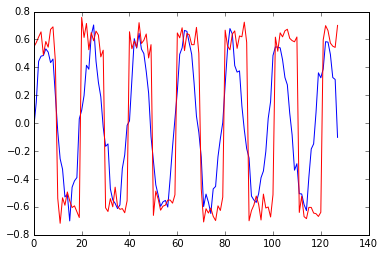

0.480713605881
S: 0.0521447
S: 0.231285
S: 0.263004
S: 0.271025


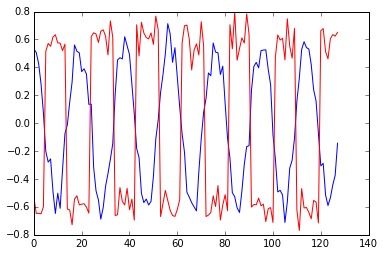

0.445069432259
S: 0.0670097
S: 0.265987
S: 0.292428
S: 0.29945


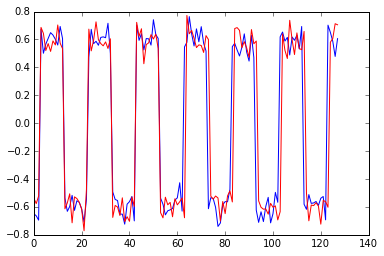

0.418552607298
S: 0.0677382
S: 0.283389
S: 0.317087
S: 0.322773


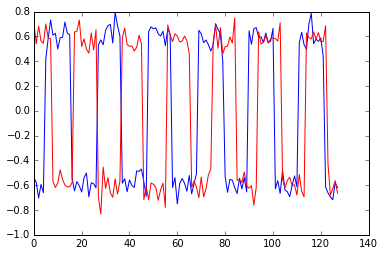

0.372861355543
S: 0.080964
S: 0.286215
S: 0.319183
S: 0.326312


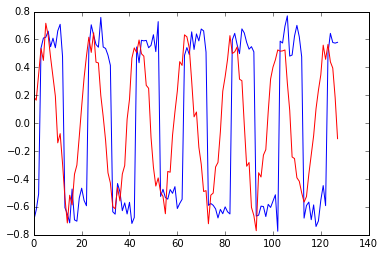

0.359783411026
S: 0.0862182
S: 0.288953
S: 0.320899
S: 0.328894


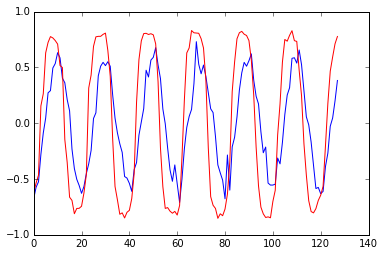

0.323893249035
S: 0.0886853
S: 0.279078
S: 0.315367
S: 0.322923


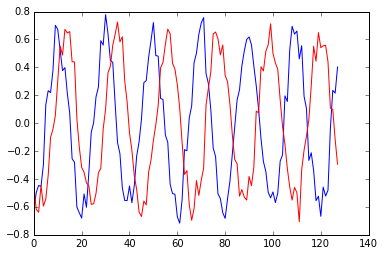

0.308322072029
S: 0.100768
S: 0.29145
S: 0.329922
S: 0.338277


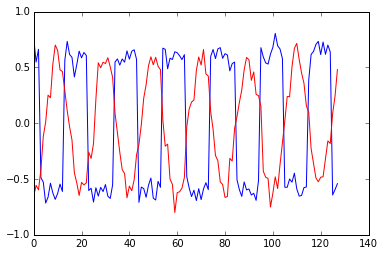

0.29202902317
S: 0.100816
S: 0.303467
S: 0.337899
S: 0.351641


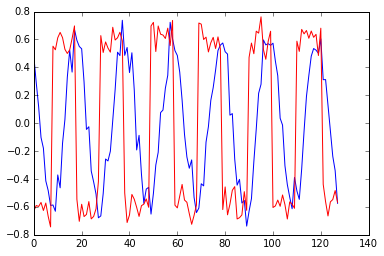

0.280501365662
S: 0.0983707
S: 0.325108
S: 0.360941
S: 0.371279


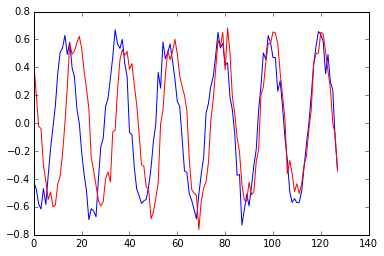

0.27592203021
S: 0.101308
S: 0.342934
S: 0.386763
S: 0.399171


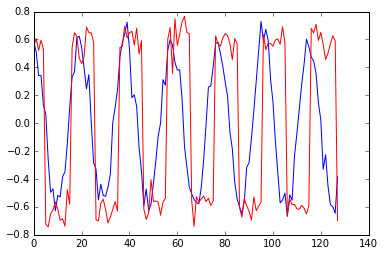

0.270860552788
S: 0.101506
S: 0.357236
S: 0.404026
S: 0.414992


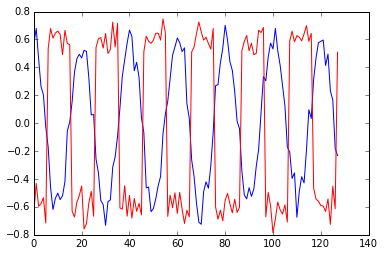

0.271941661835
S: 0.0958384
S: 0.351449
S: 0.396151
S: 0.408207


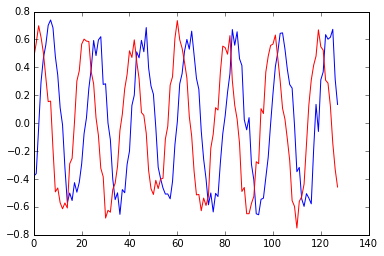

0.262640267611
S: 0.097932
S: 0.36313
S: 0.409287
S: 0.423565


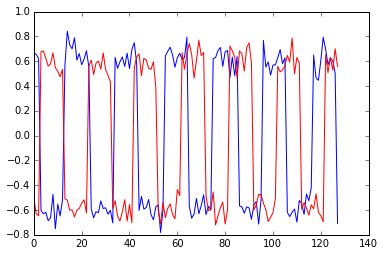

0.255200564861
S: 0.09191
S: 0.359938
S: 0.403314
S: 0.414166


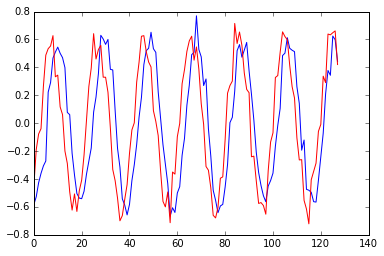

0.26220536232
S: 0.09288
S: 0.35165
S: 0.38611
S: 0.395499


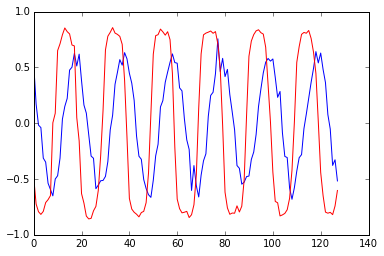

0.24565808475
S: 0.0939102
S: 0.350781
S: 0.381665
S: 0.389006


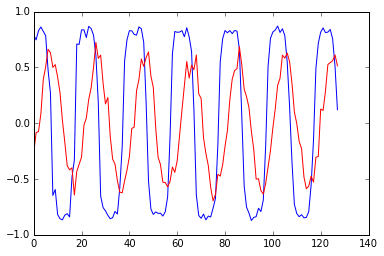

0.237216964364
S: 0.0942033
S: 0.338674
S: 0.366677
S: 0.375936


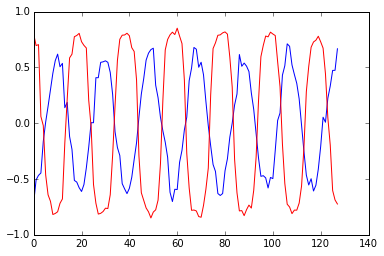

0.235206097364
S: 0.0911672
S: 0.339793
S: 0.368353
S: 0.374142


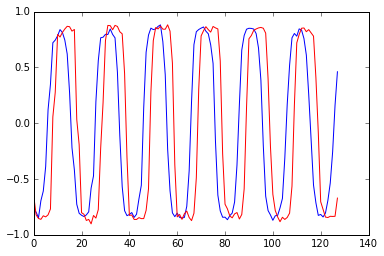

0.231003239751
S: 0.0919453
S: 0.332954
S: 0.363952
S: 0.369506


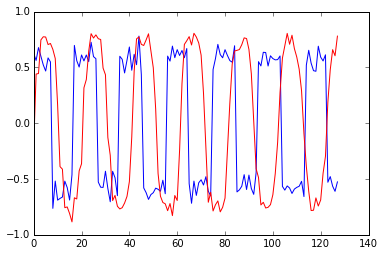

0.226267307997
S: 0.0892023
S: 0.324227
S: 0.35201
S: 0.3577


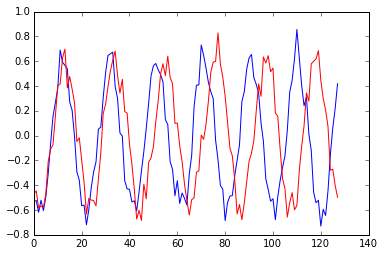

0.221051424742
S: 0.0853051
S: 0.340525
S: 0.368081
S: 0.376869


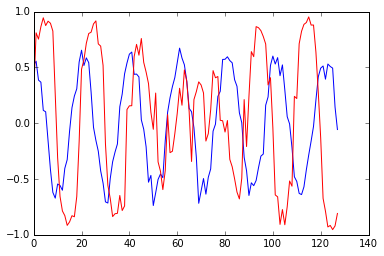

0.218242913485
S: 0.0954739
S: 0.352936
S: 0.387671
S: 0.399243


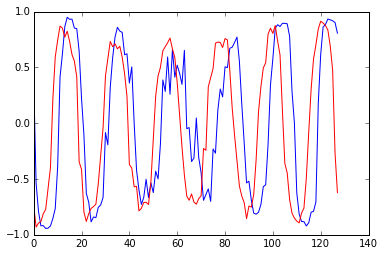

0.216609865427
S: 0.0922146
S: 0.334509
S: 0.368327
S: 0.38131


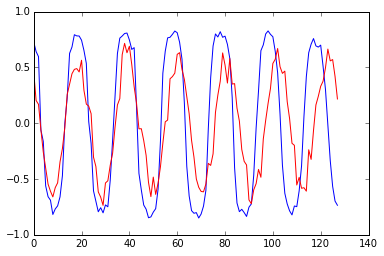

0.218984395266
S: 0.0920433
S: 0.336717
S: 0.372484
S: 0.383665


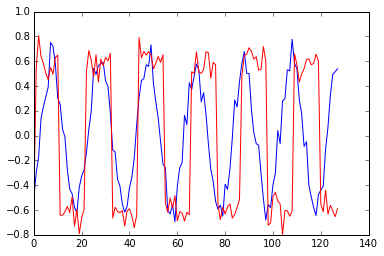

0.210400596261
S: 0.0877466
S: 0.334454
S: 0.369439
S: 0.383581


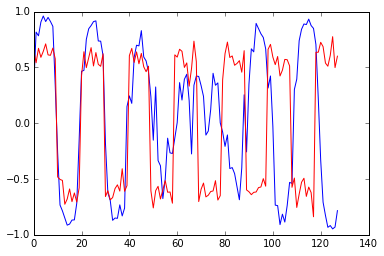

0.212024584413
S: 0.084259
S: 0.321531
S: 0.356117
S: 0.368282


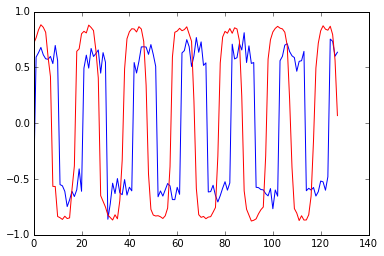

0.20656093955
S: 0.0887307
S: 0.326526
S: 0.360854
S: 0.37649


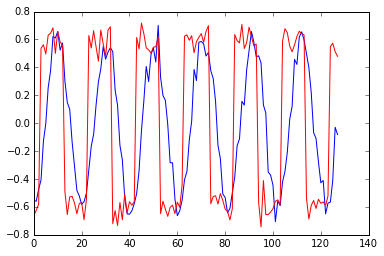

0.208676353097
S: 0.091256
S: 0.32368
S: 0.358814
S: 0.369203


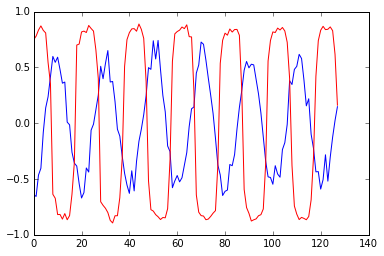

0.200960308313
S: 0.0915938
S: 0.314841
S: 0.341789
S: 0.353555


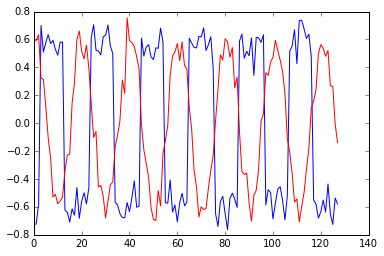

0.197611883283
S: 0.0887075
S: 0.305174
S: 0.332131
S: 0.339625


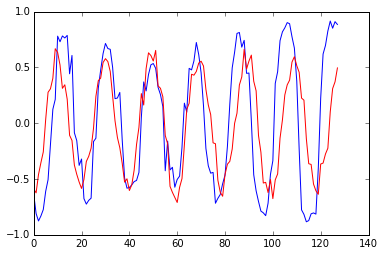

0.198985844851
S: 0.0850039
S: 0.295901
S: 0.317379
S: 0.322475


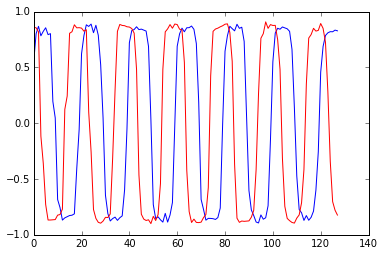

0.192627221346
S: 0.0855426
S: 0.299962
S: 0.322418
S: 0.3281


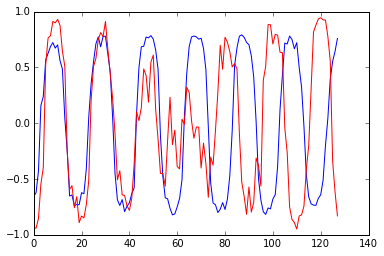

0.192762732506
S: 0.0917003
S: 0.297626
S: 0.320819
S: 0.328517


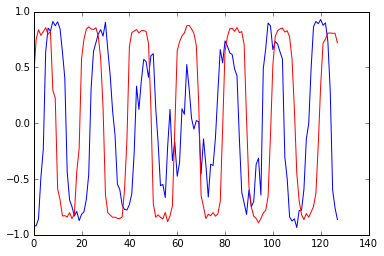

0.188894465566
S: 0.0924689
S: 0.289556
S: 0.313035
S: 0.317817


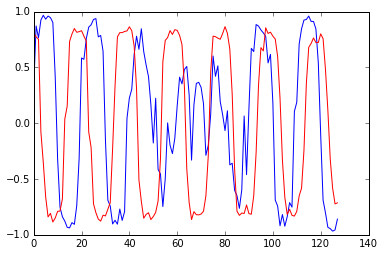

0.186352789402
S: 0.0889342
S: 0.288582
S: 0.31235
S: 0.317489


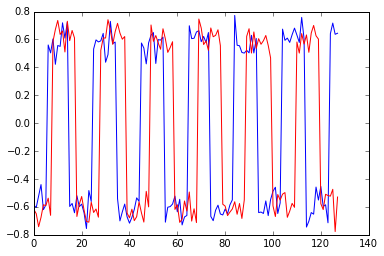

0.184407502413
S: 0.0918764
S: 0.287448
S: 0.309424
S: 0.312402


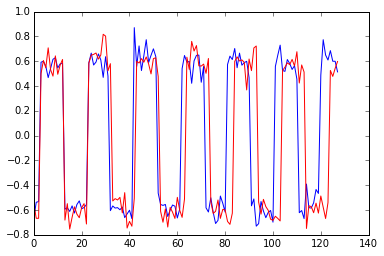

0.183341383934
S: 0.0886746
S: 0.289164
S: 0.310051
S: 0.314925


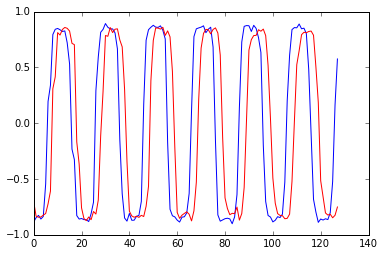

0.17971765995
S: 0.0927198
S: 0.286777
S: 0.307805
S: 0.310191


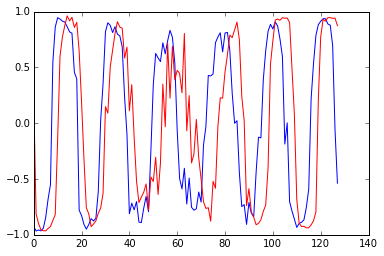

0.173647165298
S: 0.0907996
S: 0.279887
S: 0.301637
S: 0.303892


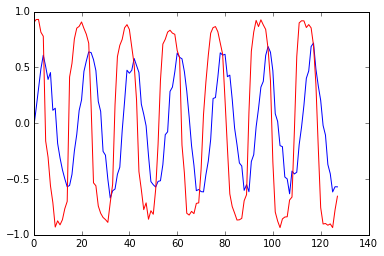

0.172997176647
S: 0.092893
S: 0.288123
S: 0.305593
S: 0.308743


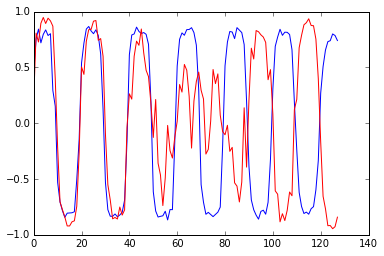

0.170462533832
S: 0.0910702
S: 0.288518
S: 0.305989
S: 0.310933


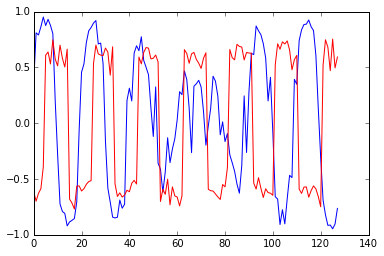

0.171651929617
S: 0.0946443
S: 0.294472
S: 0.316925
S: 0.32263


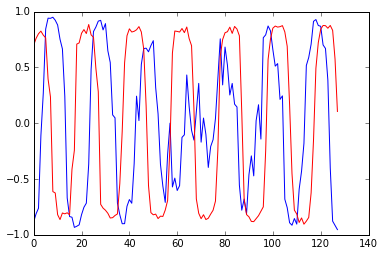

0.17184266448
S: 0.0918928
S: 0.294639
S: 0.317572
S: 0.321213


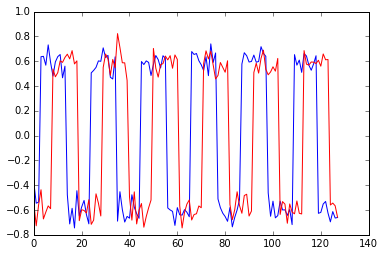

0.174953073263
S: 0.0892543
S: 0.294104
S: 0.314705
S: 0.317543


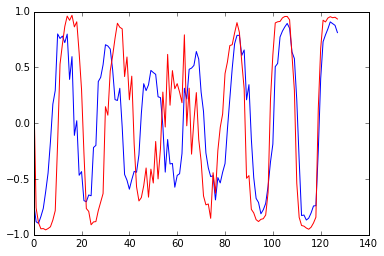

0.168589904904
S: 0.0940264
S: 0.298243
S: 0.316594
S: 0.32026


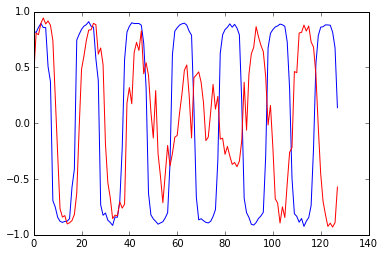

0.162116661668
S: 0.0881518
S: 0.287356
S: 0.310196
S: 0.313222


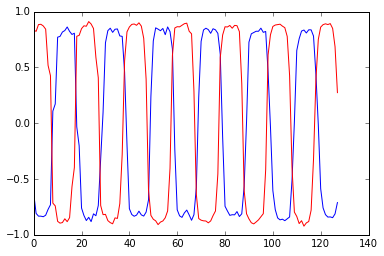

0.163119643927
S: 0.0912884
S: 0.293208
S: 0.312999
S: 0.317281


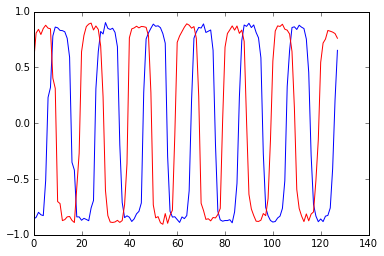

0.159720316529
S: 0.0933474
S: 0.282761
S: 0.300979
S: 0.304205


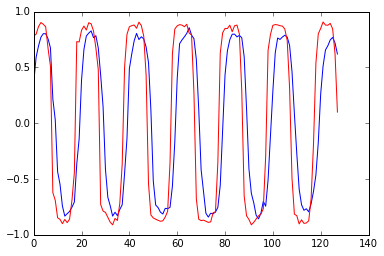

0.159779056907
S: 0.0908085
S: 0.281454
S: 0.302492
S: 0.306021


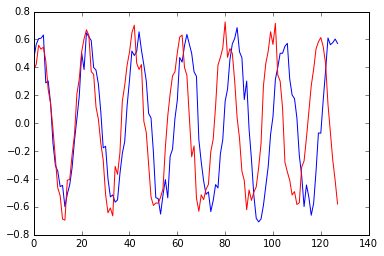

0.155935570598
S: 0.0892342
S: 0.274068
S: 0.294651
S: 0.299079


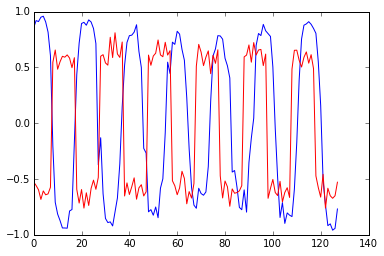

0.153950095177
S: 0.0940839
S: 0.275859
S: 0.298395
S: 0.301476


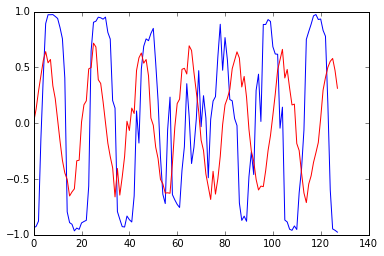

0.15366654098
S: 0.0914349
S: 0.274245
S: 0.293193
S: 0.297262


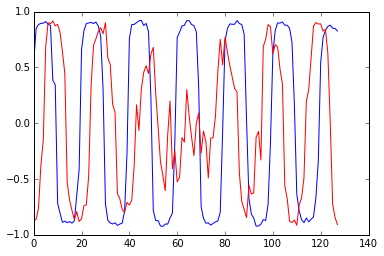

0.147898197174
S: 0.0928539
S: 0.271388
S: 0.288249
S: 0.291285


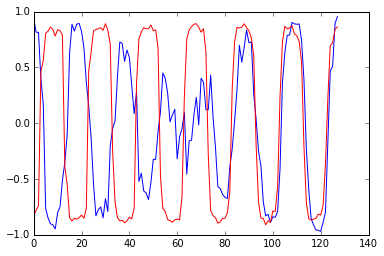

0.145221471786
S: 0.0963564
S: 0.262444
S: 0.280734
S: 0.283873


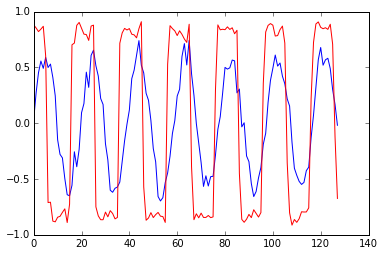

0.150094509125
S: 0.0957971
S: 0.264707
S: 0.284132
S: 0.286916


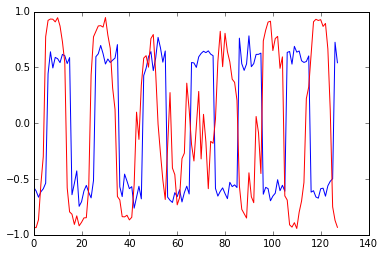

0.145246207714
S: 0.0987452
S: 0.265578
S: 0.283394
S: 0.287246


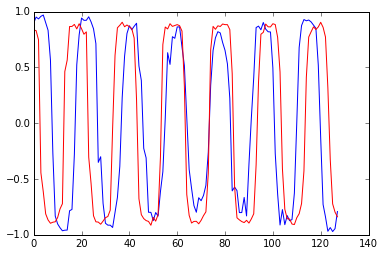

0.147779017687
S: 0.0967112
S: 0.265503
S: 0.284161
S: 0.28544


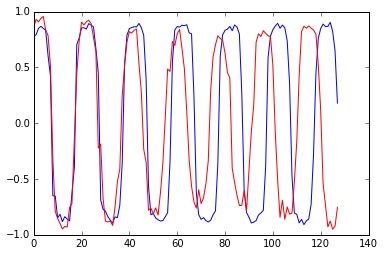

0.144417792559
S: 0.0945766
S: 0.266723
S: 0.282883
S: 0.287535


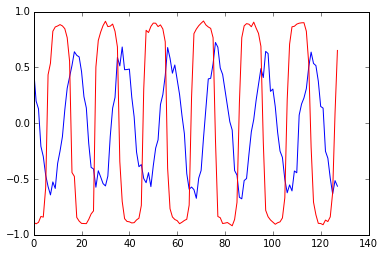

0.14132027328
S: 0.0955124
S: 0.260047
S: 0.2792
S: 0.28159


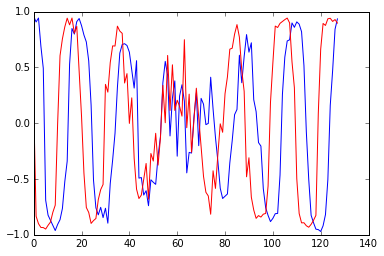

0.138913303614
S: 0.0977085
S: 0.261917
S: 0.277123
S: 0.280367


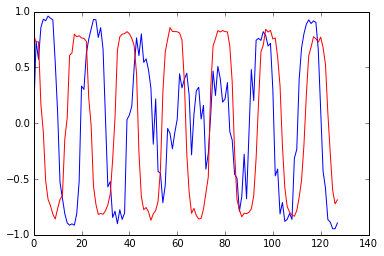

0.137602522969
S: 0.0992507
S: 0.26214
S: 0.279633
S: 0.281751


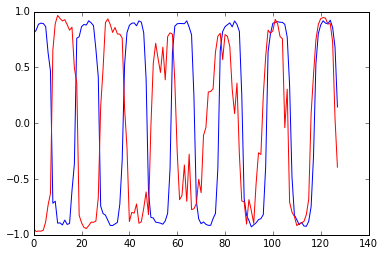

0.139750346541
S: 0.0935502
S: 0.260824
S: 0.279453
S: 0.282499


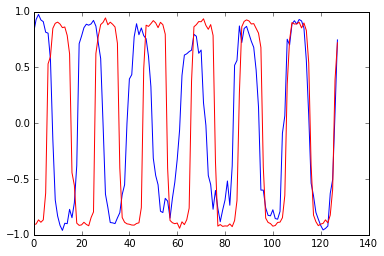

0.135502681136
S: 0.0974814
S: 0.255836
S: 0.272072
S: 0.273187


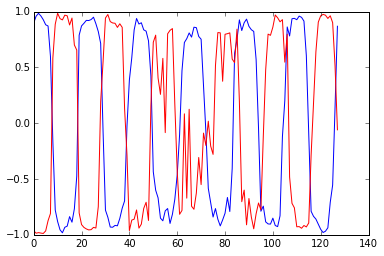

0.136853158474
S: 0.0979962
S: 0.261929
S: 0.277028
S: 0.280043


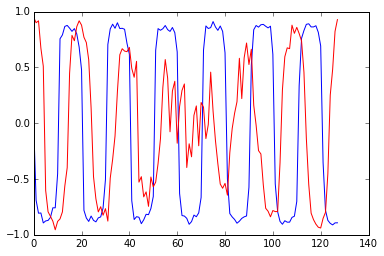

0.131926074624
S: 0.0993075
S: 0.258547
S: 0.273804
S: 0.276305


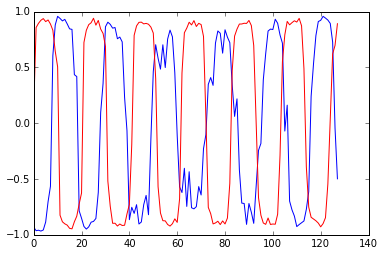

0.129680544138
S: 0.0960467
S: 0.253003
S: 0.270542
S: 0.2742


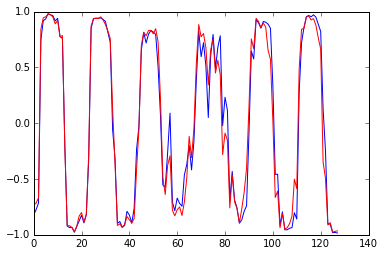

0.131536796689
S: 0.0964478
S: 0.252826
S: 0.270255
S: 0.272177


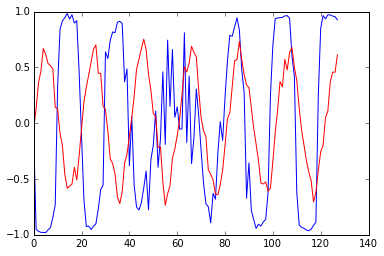

0.131134718657
S: 0.0953069
S: 0.254653
S: 0.270249
S: 0.273693


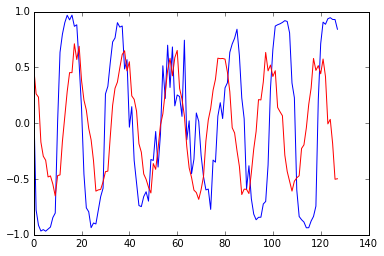

0.130306333303
S: 0.0957098
S: 0.248303
S: 0.265508
S: 0.268857


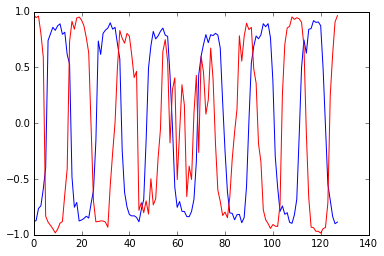

0.129788294435
S: 0.0980287
S: 0.247472
S: 0.263902
S: 0.265601


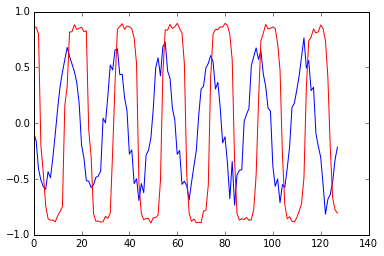

0.12760822475
S: 0.0967798
S: 0.249819
S: 0.266034
S: 0.268453


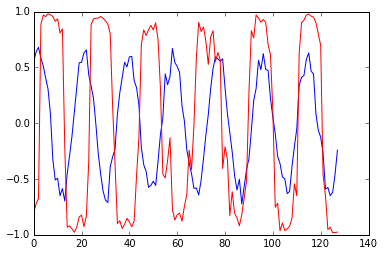

0.126871421933
S: 0.0948342
S: 0.250873
S: 0.265145
S: 0.268027


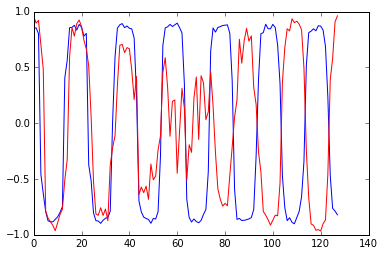

0.126585930586
S: 0.0960575
S: 0.246675
S: 0.260947
S: 0.264326


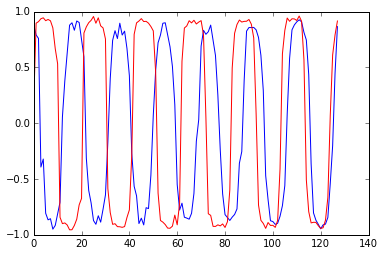

0.126651018858
S: 0.10123
S: 0.251618
S: 0.264938
S: 0.268211


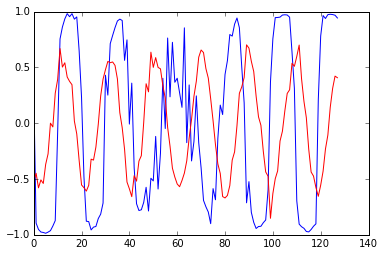

0.123856127262
S: 0.096633
S: 0.240127
S: 0.253277
S: 0.256346


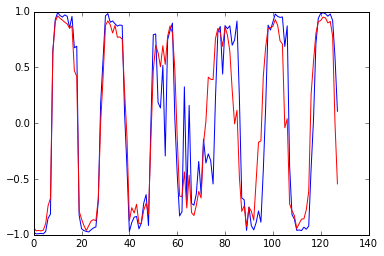

0.12438736856
S: 0.0982453
S: 0.246768
S: 0.260813
S: 0.26205


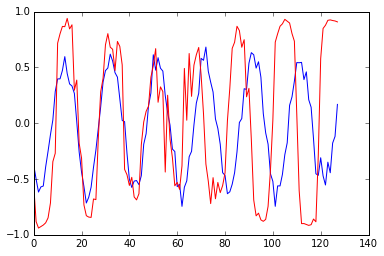

0.120231047273
S: 0.0972526
S: 0.2355
S: 0.248739
S: 0.251333


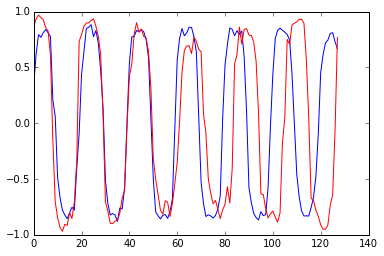

0.12099583447
S: 0.0986829
S: 0.231448
S: 0.244446
S: 0.246715


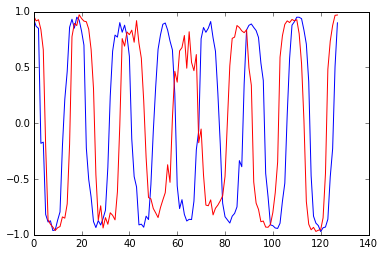

0.118786357343
S: 0.100884
S: 0.236779
S: 0.248546
S: 0.251229


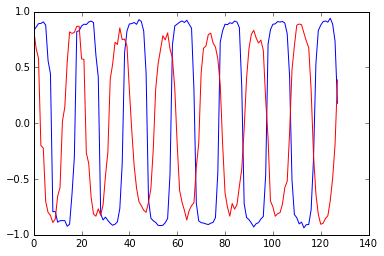

0.118424423039
S: 0.0935897
S: 0.231435
S: 0.244508
S: 0.249861


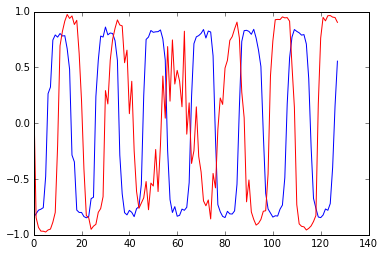

0.11961209029
S: 0.102857
S: 0.244118
S: 0.256241
S: 0.258665


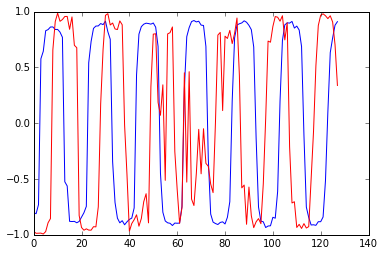

0.11920376122
S: 0.0966538
S: 0.234068
S: 0.247003
S: 0.25006


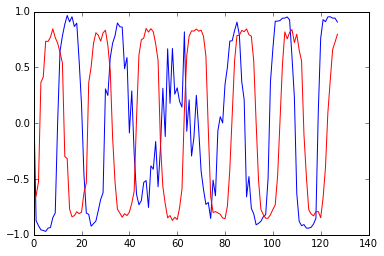

0.116314128041
S: 0.0979536
S: 0.231827
S: 0.248233
S: 0.25193


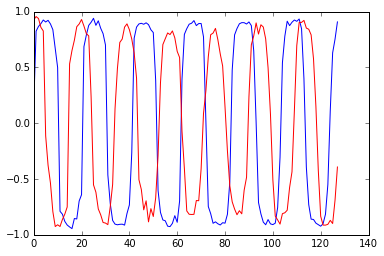

0.112783536315
S: 0.102771
S: 0.242619
S: 0.25702
S: 0.260861


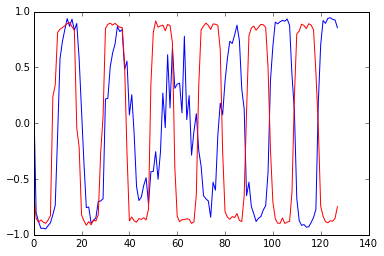

0.114435993135
S: 0.0973473
S: 0.243342
S: 0.263656
S: 0.273281


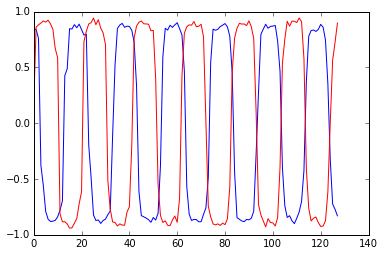

0.117327943444
S: 0.100338
S: 0.256617
S: 0.280668
S: 0.29229


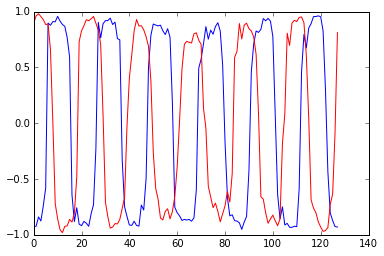

0.116697013378
S: 0.0981317
S: 0.246452
S: 0.270121
S: 0.27921


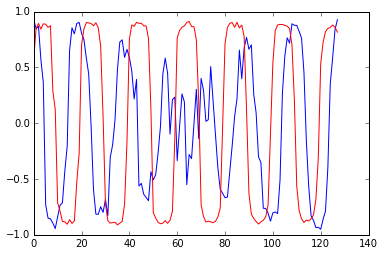

0.118417486548
S: 0.0986959
S: 0.248189
S: 0.276176
S: 0.289196


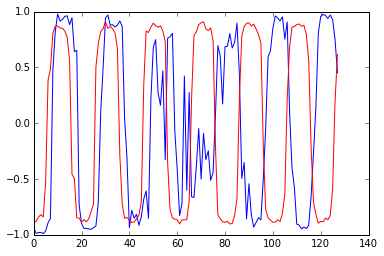

0.114681765437
S: 0.100824
S: 0.256403
S: 0.277916
S: 0.285783


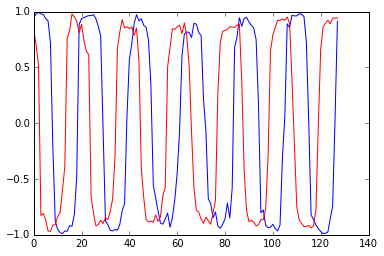

0.113622501493
S: 0.098566
S: 0.237865
S: 0.259052
S: 0.267887


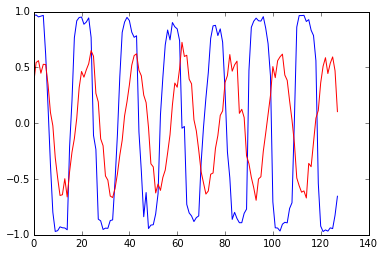

0.116864845157
S: 0.0980397
S: 0.246626
S: 0.270544
S: 0.279997


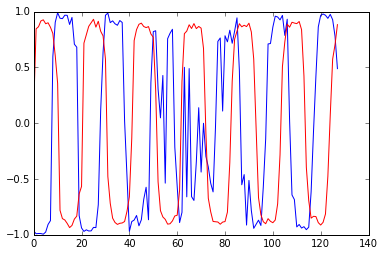

0.113884404302
S: 0.0963337
S: 0.236995
S: 0.258212
S: 0.269365


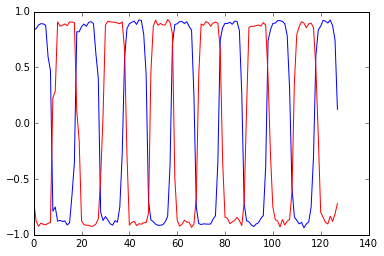

0.111762583256
S: 0.101896
S: 0.241886
S: 0.263716
S: 0.272281


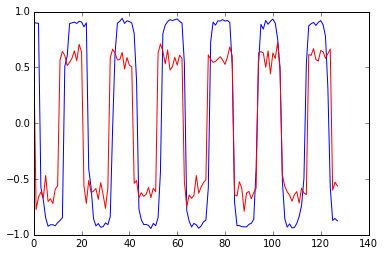

0.11031730473
S: 0.0991733
S: 0.244944
S: 0.272112
S: 0.2791


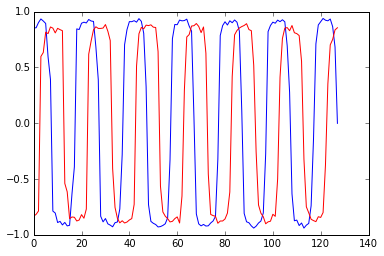

0.108504526317
S: 0.0997487
S: 0.238879
S: 0.26173
S: 0.270088


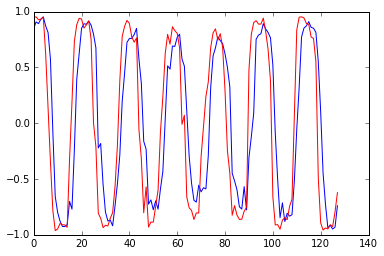

0.110963836312
S: 0.10218
S: 0.23171
S: 0.250831
S: 0.258519


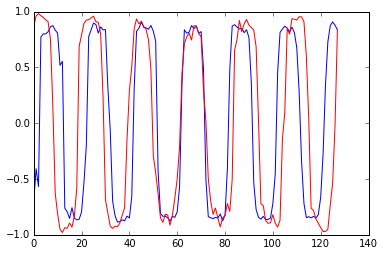

0.10937730968
S: 0.099433
S: 0.242979
S: 0.262026
S: 0.270915


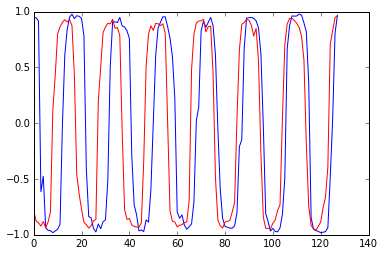

0.108785040677
S: 0.101172
S: 0.225141
S: 0.239352
S: 0.246925


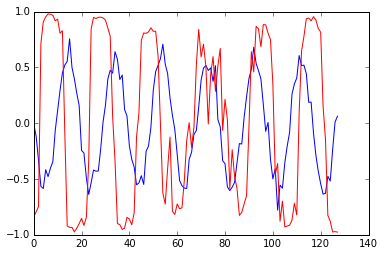

0.105715289712
S: 0.0987468
S: 0.230322
S: 0.246385
S: 0.251839


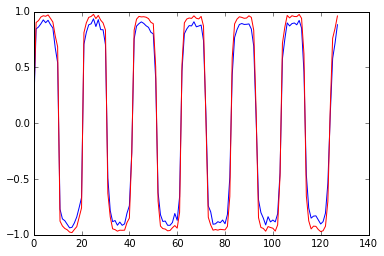

0.106183350086
S: 0.100965
S: 0.220478
S: 0.233323
S: 0.237516


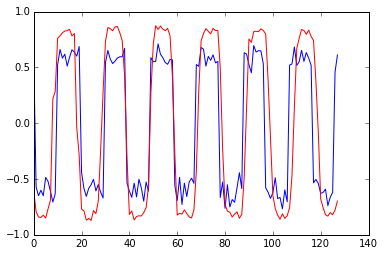

0.106067843735
S: 0.105741
S: 0.231039
S: 0.241236
S: 0.245693


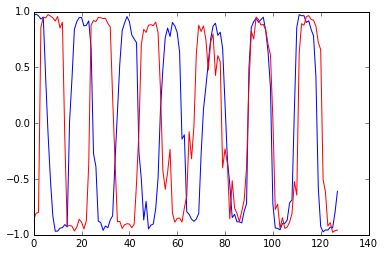

0.109374091029
S: 0.103506
S: 0.221692
S: 0.233076
S: 0.237806


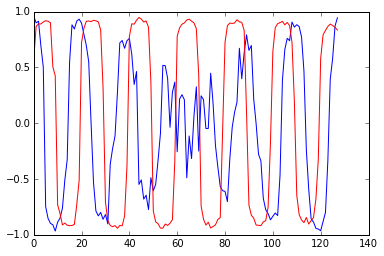

0.10751055181
S: 0.103041
S: 0.219773
S: 0.231079
S: 0.233577


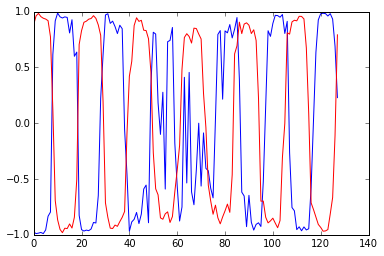

0.105383038521
S: 0.10437
S: 0.21892
S: 0.232384
S: 0.236608


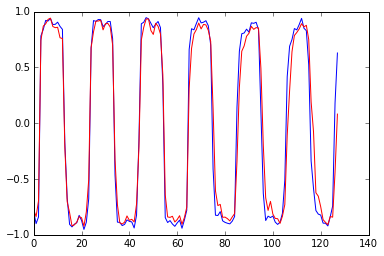

0.106165766716
S: 0.107847
S: 0.228678
S: 0.240701
S: 0.248416


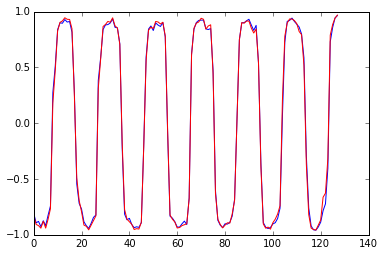

0.105640351772
S: 0.111375
S: 0.227685
S: 0.239322
S: 0.245424


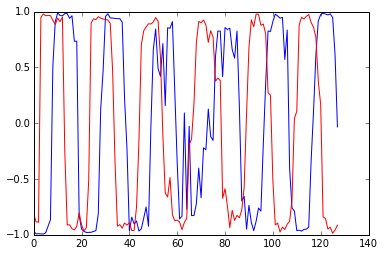

0.107374474406
S: 0.105405
S: 0.22217
S: 0.235966
S: 0.24226


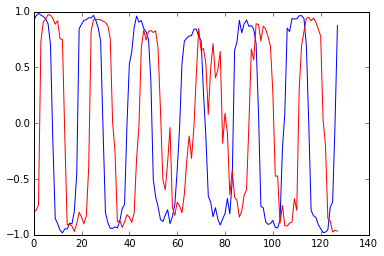

0.110376775265
S: 0.105796
S: 0.222496
S: 0.236413
S: 0.242209


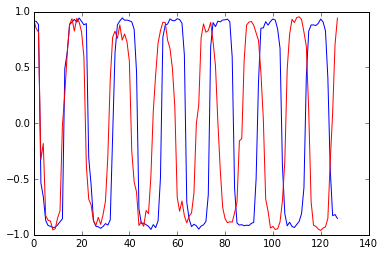

0.10520657897
S: 0.104537
S: 0.225736
S: 0.23938
S: 0.242837


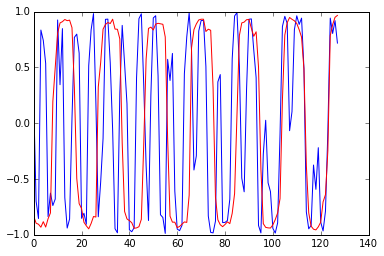

0.105087026954
S: 0.105595
S: 0.223677
S: 0.236163
S: 0.24218


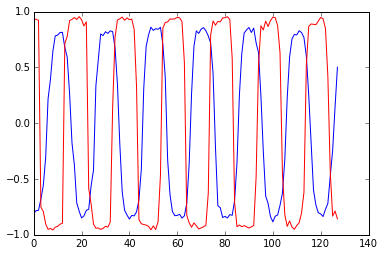

0.10396322608
S: 0.106588
S: 0.221508
S: 0.232093
S: 0.237355


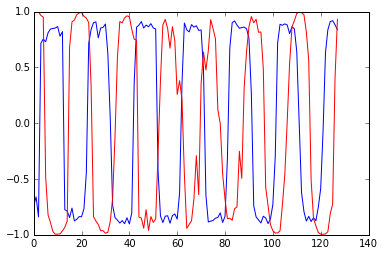

0.103758066893
S: 0.111758
S: 0.2225
S: 0.234323
S: 0.237972


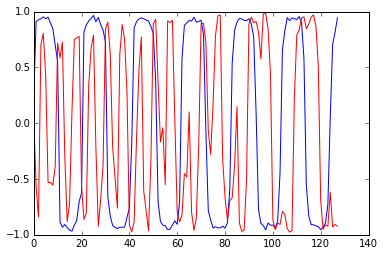

0.103567160666
S: 0.105458
S: 0.221756
S: 0.23508
S: 0.240816


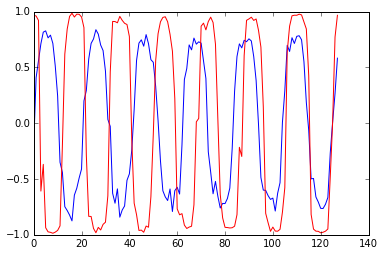

0.107365436852
S: 0.109848
S: 0.215145
S: 0.224332
S: 0.228142


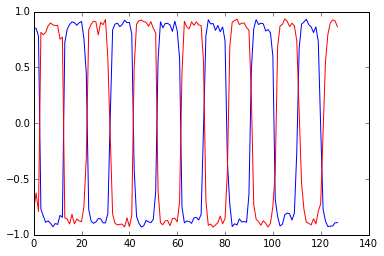

0.10486022383
S: 0.113658
S: 0.226411
S: 0.23799
S: 0.240513


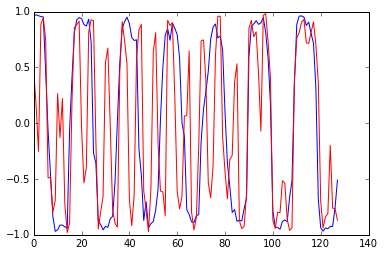

0.102958224714
S: 0.108744
S: 0.221561
S: 0.231294
S: 0.235199


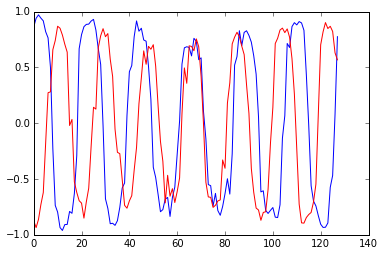

0.104264058173
S: 0.10891
S: 0.212478
S: 0.220963
S: 0.224173


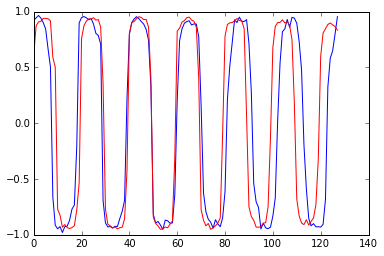

0.104763872921
S: 0.108573
S: 0.216766
S: 0.230993
S: 0.236335


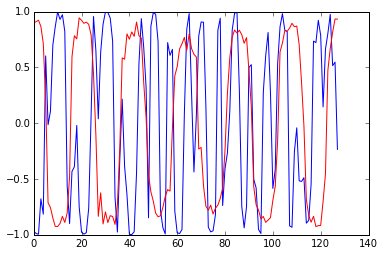

0.102149806917
S: 0.108561
S: 0.218899
S: 0.230195
S: 0.233269


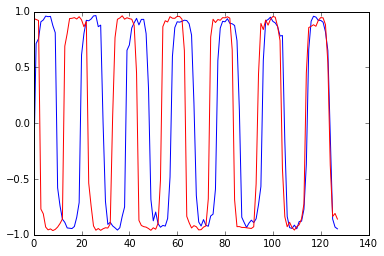

0.102303750813
S: 0.110793
S: 0.216559
S: 0.227375
S: 0.233624


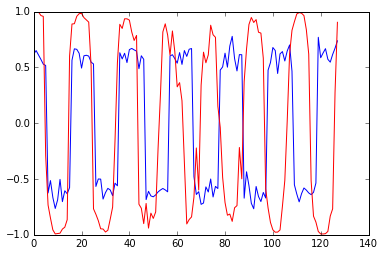

0.101638279855
S: 0.112687
S: 0.214058
S: 0.222848
S: 0.226199


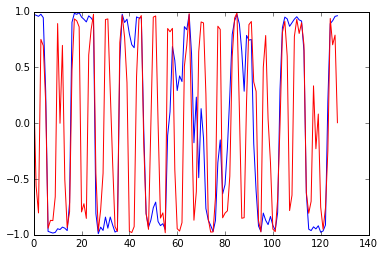

0.100107491016
S: 0.109403
S: 0.210238
S: 0.219229
S: 0.221972


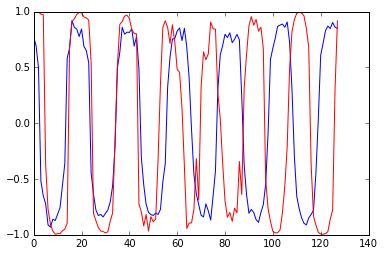

0.101864352822
S: 0.109347
S: 0.203157
S: 0.210504
S: 0.213885


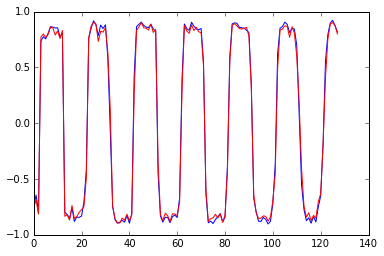

0.100627161562
S: 0.113907
S: 0.208819
S: 0.217348
S: 0.218698


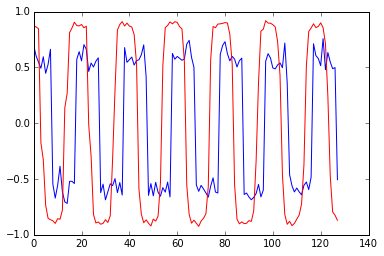

0.101373404264
S: 0.115248
S: 0.207057
S: 0.213442
S: 0.217437


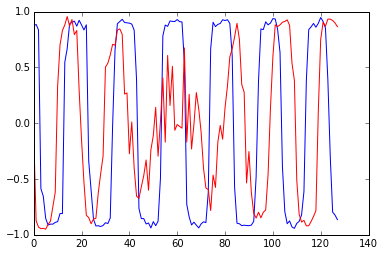

0.0976160466671
S: 0.112978
S: 0.202982
S: 0.210884
S: 0.213192


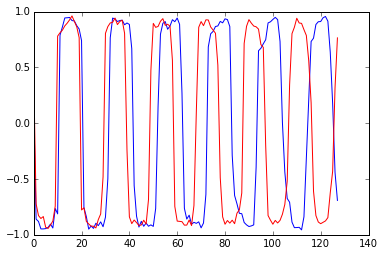

0.0990454703569
S: 0.11718
S: 0.207472
S: 0.216127
S: 0.219141


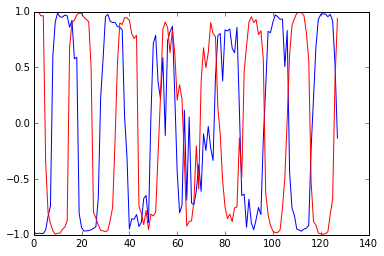

0.0983261540532
S: 0.1177
S: 0.20623
S: 0.215143
S: 0.219956


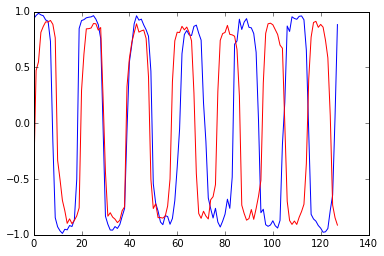

0.0961245000362
S: 0.111708
S: 0.20373
S: 0.214861
S: 0.216859


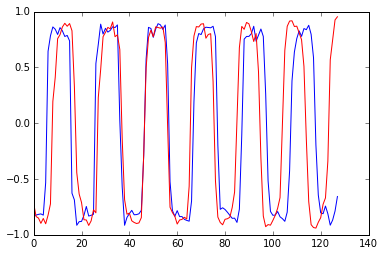

0.104230210185
S: 0.116982
S: 0.206206
S: 0.21823
S: 0.223033


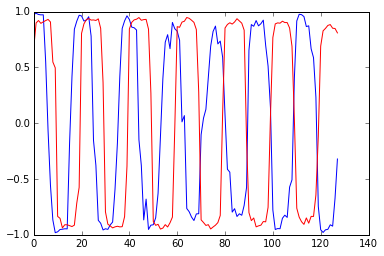

0.101216390729
S: 0.123655
S: 0.217572
S: 0.229556
S: 0.235468


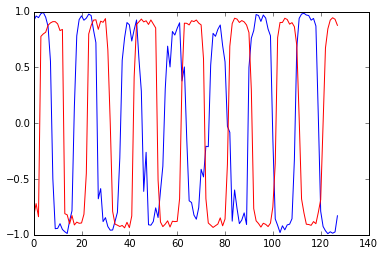

0.105137258768
S: 0.115794
S: 0.210577
S: 0.221733
S: 0.225564


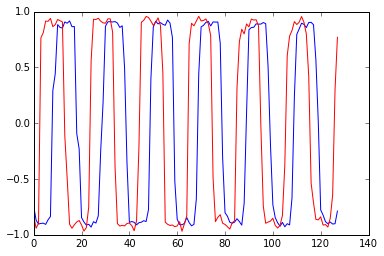

0.102963805199
S: 0.119355
S: 0.214616
S: 0.2276
S: 0.234482


0.103132776916
S: 0.121424
S: 0.207662
S: 0.219178
S: 0.226279


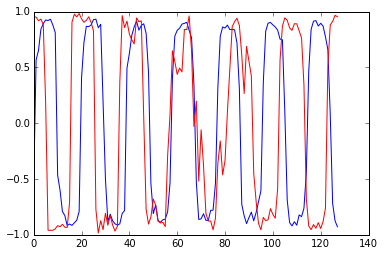

0.0989006012678
S: 0.116276
S: 0.204218
S: 0.215928
S: 0.222845


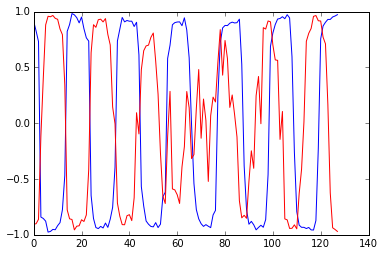

0.0992486923933
S: 0.114371
S: 0.201583
S: 0.212034
S: 0.21728


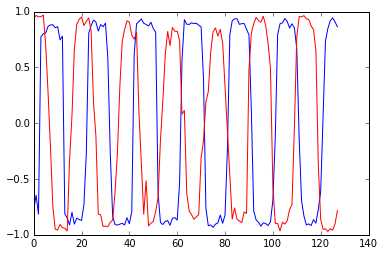

0.0993259698153
S: 0.117538
S: 0.205081
S: 0.220631
S: 0.226296


0.104927688837
S: 0.121277
S: 0.216672
S: 0.23855
S: 0.249815


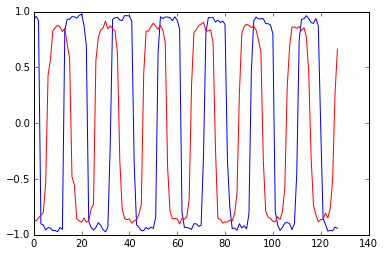

0.101932309568
S: 0.124493
S: 0.229654
S: 0.251763
S: 0.261667


0.105187192559
S: 0.126357
S: 0.222416
S: 0.244687
S: 0.256392


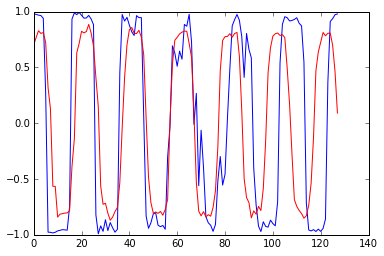

0.103503920138
S: 0.125158
S: 0.224511
S: 0.243984
S: 0.258348


0.100145712495
S: 0.123893
S: 0.216989
S: 0.234946
S: 0.243142


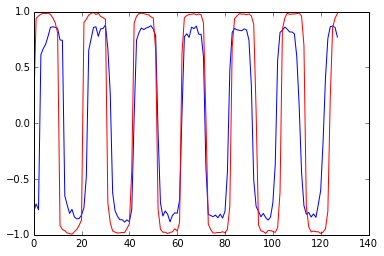

0.104014068842
S: 0.12127
S: 0.213692
S: 0.227807
S: 0.233911


0.102362722158
S: 0.124322
S: 0.215308
S: 0.225911
S: 0.231007


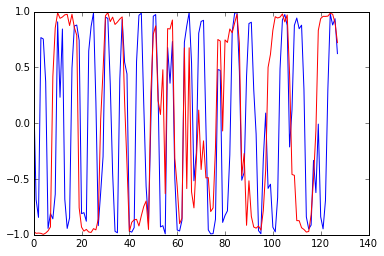

0.101337730885
S: 0.127034
S: 0.222191
S: 0.234606
S: 0.239002


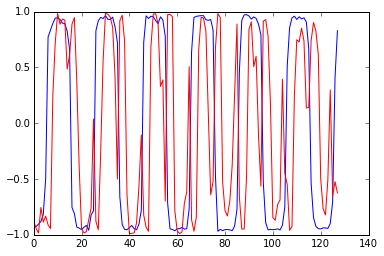

0.0988518148661
S: 0.123225
S: 0.209561
S: 0.220637
S: 0.22503


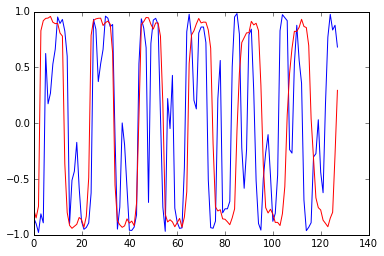

0.100434601307
S: 0.126315
S: 0.211793
S: 0.222997
S: 0.228469


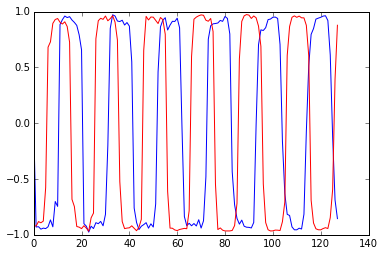

0.098431840539
S: 0.12916
S: 0.21155
S: 0.221722
S: 0.228133


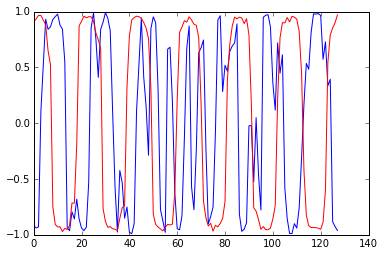

0.0994227528572
S: 0.127413
S: 0.207782
S: 0.218446
S: 0.224568


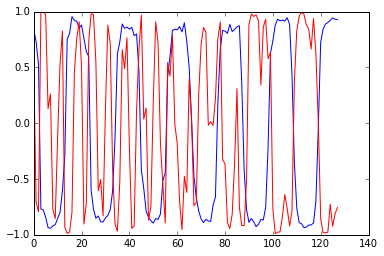

0.0989716202021
S: 0.131528
S: 0.209144
S: 0.220161
S: 0.225147


0.0999781414866
S: 0.131339
S: 0.206633
S: 0.214024
S: 0.214313


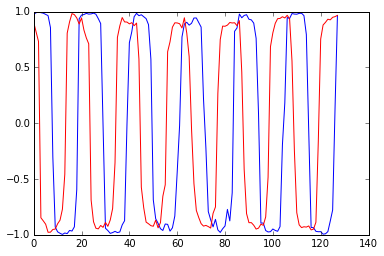

0.103353112936
S: 0.134577
S: 0.210701
S: 0.218604
S: 0.223309


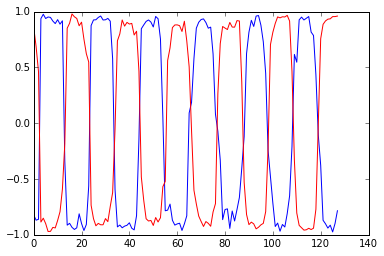

0.101291611791
S: 0.136213
S: 0.210273
S: 0.215997
S: 0.218996


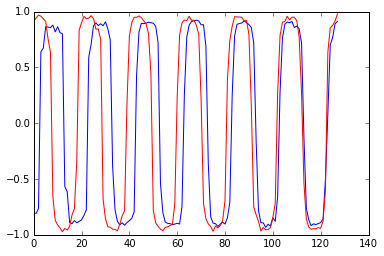

0.0995562896132
S: 0.132587
S: 0.205579
S: 0.210352
S: 0.213089


0.104184880853
S: 0.12883
S: 0.199974
S: 0.205697
S: 0.207327


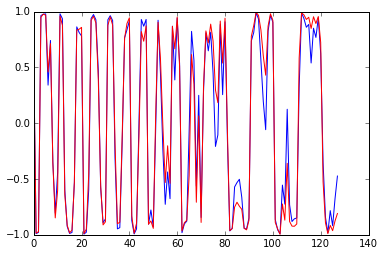

0.101051062346
S: 0.136415
S: 0.209351
S: 0.216342
S: 0.217897


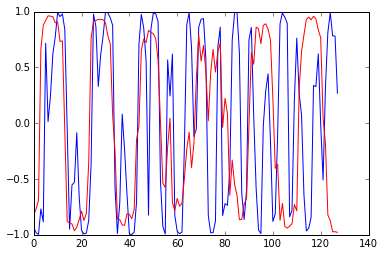

0.100938931108
S: 0.132124
S: 0.201775
S: 0.206418
S: 0.20719


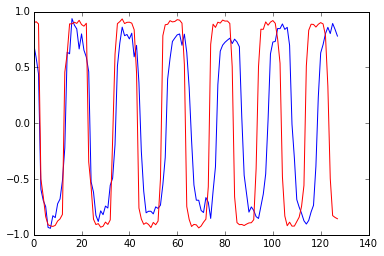

0.101310163736
S: 0.134023
S: 0.20072
S: 0.205831
S: 0.207232


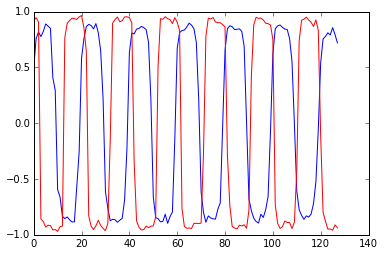

0.099871635437
S: 0.128913
S: 0.198556
S: 0.202944
S: 0.204955


0.100958764553
S: 0.134642
S: 0.202594
S: 0.206602
S: 0.209199


0.0995689630508
S: 0.134623
S: 0.202487
S: 0.206536
S: 0.206506


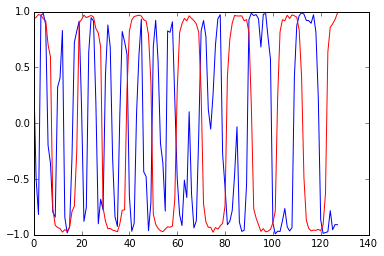

0.102474093437
S: 0.1373
S: 0.203106
S: 0.207129
S: 0.20799


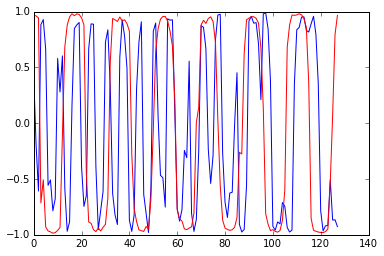

0.101075142622
S: 0.139268
S: 0.204141
S: 0.208365
S: 0.20986


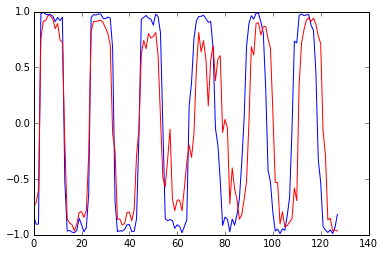

0.0994089618325
S: 0.129913
S: 0.196463
S: 0.201085
S: 0.203289


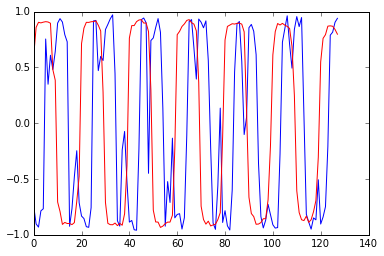

0.0983744561672
S: 0.134191
S: 0.200277
S: 0.2056
S: 0.207495


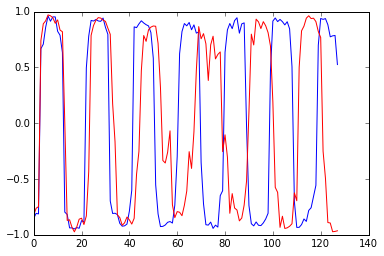

0.0987571179867
S: 0.134133
S: 0.205077
S: 0.212845
S: 0.217523


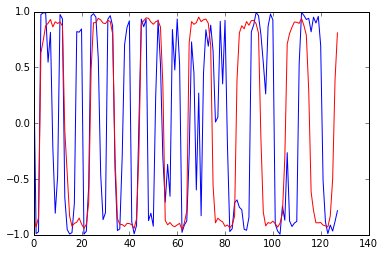

0.101123079658
S: 0.134914
S: 0.204319
S: 0.210569
S: 0.214018


0.101072713733
S: 0.13622
S: 0.205781
S: 0.211929
S: 0.215801


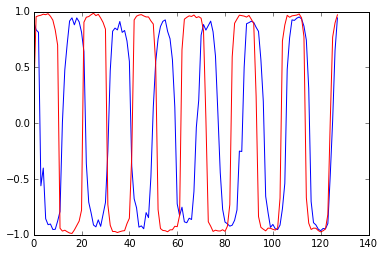

0.101723223925
S: 0.137924
S: 0.215573
S: 0.225615
S: 0.228117


0.102364562452
S: 0.140579
S: 0.216067
S: 0.22425
S: 0.227076


0.0994569957256
S: 0.137753
S: 0.213503
S: 0.220647
S: 0.223908


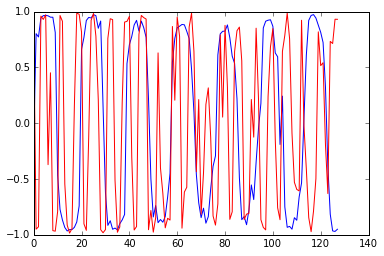

0.100059404969
S: 0.140105
S: 0.217372
S: 0.225177
S: 0.227103


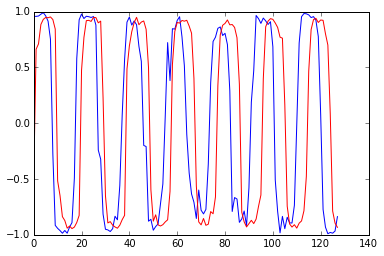

0.101424448192
S: 0.139928
S: 0.23007
S: 0.251509
S: 0.268295


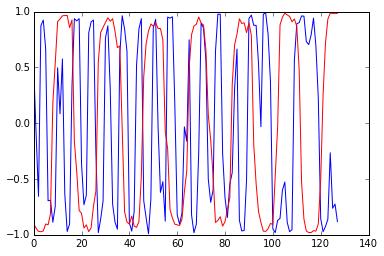

0.101098261774
S: 0.138044
S: 0.22705
S: 0.248959
S: 0.259603


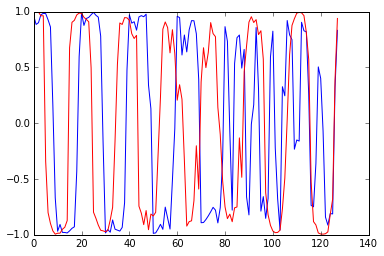

0.105550274253
S: 0.14131
S: 0.229442
S: 0.245771
S: 0.251595


0.102640137076
S: 0.137027
S: 0.207172


KeyboardInterrupt: 

In [51]:
#data = sample(1000)
for epoch in range(100):
    idx = np.random.permutation(data.shape[0])
    data = data[idx]
    err = train(data[0:5000])
print err

for cycle in range(200):
    for epoch in range(10):
        idx = np.random.permutation(data.shape[0])
        data = data[idx]
        err = train(data[0:5000])
    print err
    
    codes, ndata = genSurprises()
    dc = encode(data)
    data[39000:] = ndata
    
    plt.plot(dc[:,0],dc[:,1],'b.',alpha=0.25)
    plt.plot(codes[:,0],codes[:,1],'r.')
    plt.xlim(-1.5,1.5)
    plt.ylim(-1.5,1.5)
    plt.savefig("codes/%.6d.png" % cycle)
    #plt.show()
    plt.clf()
    
    plt.plot(data[0,:],'b-')
    plt.plot(data[39500,:],'r-')
    plt.show()

In [ ]:
codes = encode(data)
plt.plot(codes[:,0],codes[:,1],'r.')
#plt.hist2d(codes[:,0],codes[:,1],80)
plt.show()

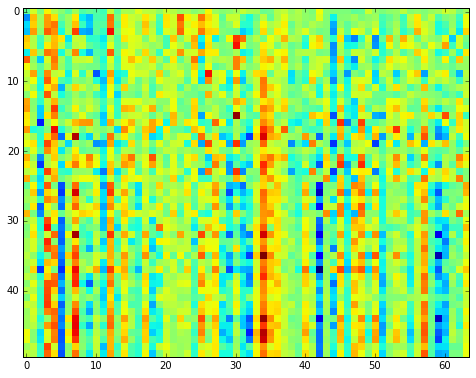

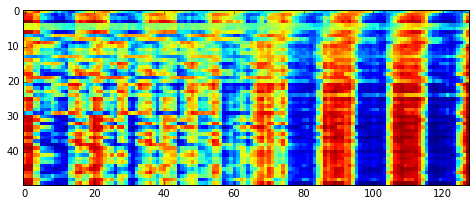

In [55]:
code1 = np.random.randn(1,LATENT)
code2 = np.random.randn(1,LATENT)

u = np.arange(0,1,0.005).reshape((200,1))
uc = code1*(1-u)+code2*u
ud = decode(uc)

plt.imshow(encode(ud[::4,:]), interpolation='nearest')
plt.gcf().set_size_inches((8,8))
#plt.plot(data[4,:],'r-')
plt.show()
plt.imshow(ud[::4,:], interpolation='nearest')
plt.gcf().set_size_inches((8,8))
#plt.plot(data[4,:],'r-')
plt.show()

In [62]:
plt.plot(data[23,:])
plt.show()